## 1️⃣ What is UMAP?

UMAP (**Uniform Manifold Approximation and Projection**) is another **dimensionality reduction** method, like t-SNE, but:

* It’s **much faster** (especially on large datasets).
* It tries to keep **both local and global structure** intact — not just local neighborhoods.

---

## 2️⃣ Local and Global Structure

* **Local structure** = preserving relationships between **close neighbors** in the original high-dimensional space.
  Example: keeping a small friend group together on the map.
* **Global structure** = preserving the **overall shape** and distance between clusters.
  Example: showing that two friend groups are *far apart* in reality.

💡 **Key difference** from t-SNE:

* t-SNE focuses mainly on **local** structure (neighbor clusters look great, but their distances can be distorted).
* UMAP balances **local + global**, so cluster spacing is more meaningful.

---

## 3️⃣ Why UMAP is Faster

* **t-SNE** repeatedly updates all points based on probabilities, which is slow for large datasets.
* **UMAP** builds a **graph of neighbor connections** once, then optimizes that graph in fewer steps.
* This graph-based approach makes it **much faster** and scalable to millions of points.

---

## 4️⃣ Summary Table

| Feature                    | t-SNE               | UMAP                      |
| -------------------------- | ------------------- | ------------------------- |
| Preserves local structure  | ✅ Excellent         | ✅ Excellent               |
| Preserves global structure | ❌ Not great         | ✅ Better                  |
| Speed                      | Slow for large data | Much faster               |
| Main tuning parameter      | Perplexity          | `n_neighbors`, `min_dist` |



e:\Important\Skills\ML-Algo\env\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
e:\Important\Skills\ML-Algo\env\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


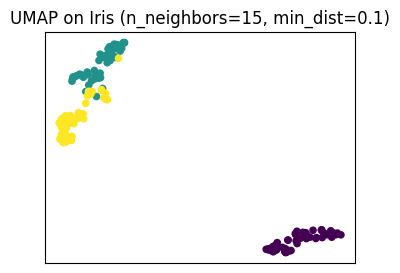

In [1]:
from sklearn.datasets import load_iris
import umap
import matplotlib.pyplot as plt

# 1) Load data
X, y = load_iris(return_X_y=True)

# 2) Build a UMAP reducer
reducer = umap.UMAP(
    n_neighbors=15,  # how many neighbors define local structure
    min_dist=0.1,    # how tightly points are packed in a cluster
    n_components=2,  # 2D map
    random_state=42
)

# 3) Learn the embedding (non-linear) and plot
Z = reducer.fit_transform(X)

plt.figure(figsize=(4,3))
plt.scatter(Z[:,0], Z[:,1], c=y, s=20)
plt.title("UMAP on Iris (n_neighbors=15, min_dist=0.1)")
plt.xticks([]); plt.yticks([])
plt.show()


e:\Important\Skills\ML-Algo\env\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
e:\Important\Skills\ML-Algo\env\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
e:\Important\Skills\ML-Algo\env\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


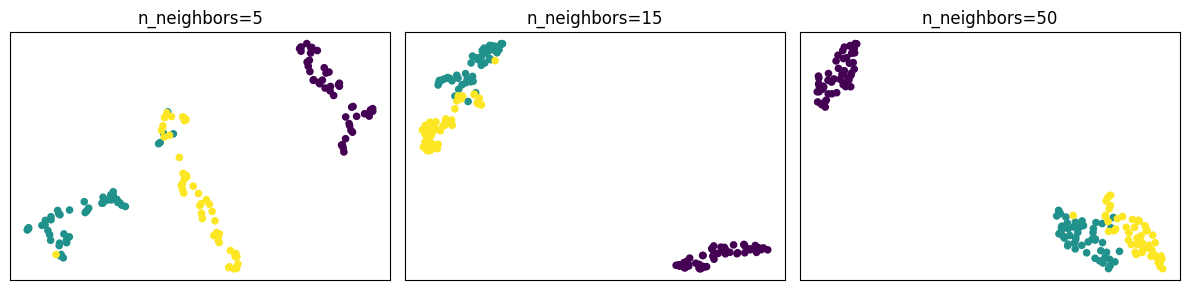

In [2]:
import matplotlib.pyplot as plt
import umap

values = [5, 15, 50]  # small=more local detail, big=more global structure
plt.figure(figsize=(12,3))

for i, n in enumerate(values, 1):
    reducer = umap.UMAP(n_neighbors=n, min_dist=0.1, random_state=42)
    Z = reducer.fit_transform(X)
    plt.subplot(1,3,i)
    plt.scatter(Z[:,0], Z[:,1], c=y, s=20)
    plt.title(f"n_neighbors={n}")
    plt.xticks([]); plt.yticks([])

plt.tight_layout()
plt.show()

e:\Important\Skills\ML-Algo\env\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
e:\Important\Skills\ML-Algo\env\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
e:\Important\Skills\ML-Algo\env\Lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


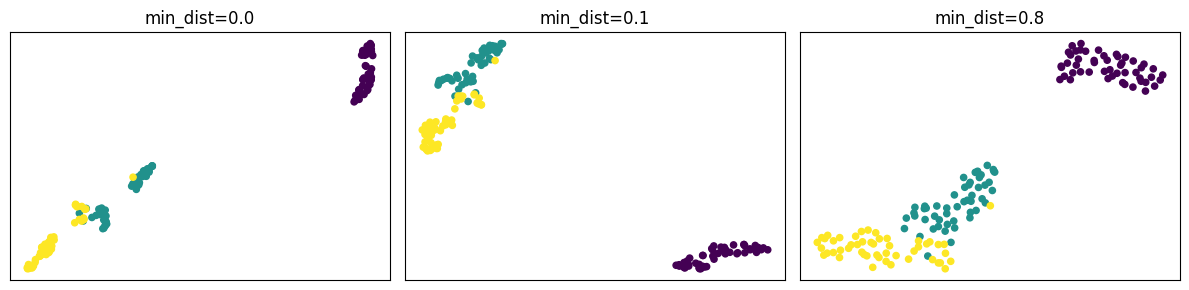

In [3]:
values = [0.0, 0.1, 0.8]  # smaller = tighter, larger = more spread-out clusters
plt.figure(figsize=(12,3))

for i, md in enumerate(values, 1):
    reducer = umap.UMAP(n_neighbors=15, min_dist=md, random_state=42)
    Z = reducer.fit_transform(X)
    plt.subplot(1,3,i)
    plt.scatter(Z[:,0], Z[:,1], c=y, s=20)
    plt.title(f"min_dist={md}")
    plt.xticks([]); plt.yticks([])

plt.tight_layout()
plt.show()
